# Global Terrorism @ LetsGrowMore

## Completed by Kyle Parsotan

# Completed this project by using classification methods:

### 1. Decision Tree
### 2. Random Forest
### 3. Data cleansing and wrangling
### 4. Data visualization

In [114]:
# read in the data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# read the csv file
set = 'global.csv'

dataset = pd.read_csv(set, encoding='ISO-8859-1')
dataset

/var/folders/n5/993s6vqj7ps4scrggc3wzy540000gn/T/ipykernel_55679/2635968501.py:10: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(set, encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [116]:
dataset = dataset.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'nkill' : 'number of kills','nwound': 'number of Wounds'})
dataset

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [117]:
dataset.shape

(181691, 135)

In [118]:
dataset.describe()

,eventid,year,month,day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
# How many countries are there? Most? Least?
dataset.country_txt.value_counts()

country_txt
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: count, Length: 205, dtype: int64

In [120]:
# How many regions are there? Most? Least?
dataset.region_txt.value_counts()

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

In [121]:
# how many states are there? most? least?
dataset.provstate.value_counts()

provstate
Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: count, Length: 2855, dtype: int64

In [122]:
# how many city are there? most? least?
dataset.city.value_counts()

city
Unknown                     9775
Baghdad                     7589
Karachi                     2652
Lima                        2359
Mosul                       2265
                            ... 
Sukirin                        1
Dehiattakandiya district       1
Oued-Djemaa                    1
Qasim                          1
Kubentog                       1
Name: count, Length: 36673, dtype: int64

In [124]:
# how many location are there? Most? least?
dataset.location.value_counts()

location
The attack took place in Baghdad, Baghdad, Iraq.                                       142
Belfast (Capital City)                                                                  98
The incident occurred at the Donetsk Sergey Prokofiev International Airport.            62
Manhattan                                                                               60
The attack took place in Mosul, Ninawa, Iraq.                                           51
                                                                                      ... 
The incident occurred in the Waberi neighborhood in Mogadishu.                           1
At the house the top advisor the president of Nigeria in Opokuma, Bayelsa, Nigeria.      1
The attack took place in San Ramon village in Masingal, Ilocos Sur, Philippines.         1
The attack took place in Laxman Bigha village in Gaya.                                   1
The incident occurred in the Datu Hoffer district.                               

In [123]:
# how many targtype1_txt were there? 
dataset['targtype1_txt'].value_counts()

targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64

In [126]:
# how many corp1?
dataset['corp1'].value_counts()

corp1
Unknown                       16356
Not Applicable                12803
Iraqi Police Service (IPS)     3287
Govt                           2784
Civilians                      2782
                              ...  
Town of Kassala                   1
Inter' Newspaper                  1
Ukrainian bank                    1
Israel Navel Forces               1
Forest Department Manipur         1
Name: count, Length: 33237, dtype: int64

In [125]:
# nationality of the terrorist
dataset['natlty1_txt'].value_counts()

natlty1_txt
Iraq                              24113
Pakistan                          13900
India                             12098
Afghanistan                       10931
Colombia                           7922
                                  ...  
People's Republic of the Congo        1
Saba (Netherlands Antilles)           1
Tuvalu                                1
Western Sahara                        1
Marshall Islands                      1
Name: count, Length: 215, dtype: int64

In [128]:
# group of terrorist that the event occurred on
dataset['gname'].value_counts() 

gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: count, Length: 3537, dtype: int64

In [127]:
# how many were targeted
dataset['target1'].value_counts()

target1
Civilians                    6461
Unknown                      5918
Soldiers                     3157
Patrol                       2942
Checkpoint                   2905
                             ... 
Military/ Police patrol         1
Thor 67 Outpost                 1
Employee's Vehicle              1
Stage for Annual Festival       1
Hmeymim Air Base                1
Name: count, Length: 86005, dtype: int64

In [130]:
# weapons that were used 
dataset['weaptype1_txt'].value_counts()

weaptype1_txt
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                       

In [129]:
# damage done from the terrorist
dataset['number of kills'].value_counts()

number of kills
0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: count, Length: 205, dtype: int64

In [132]:
# damage done from the terrorist
dataset['number of Wounds'].value_counts()

number of Wounds
0.0      103275
1.0       16033
2.0       10219
3.0        7303
4.0        4880
          ...  
727.0         1
216.0         1
751.0         1
233.0         1
316.0         1
Name: count, Length: 238, dtype: int64

#### Data Preprocessing

In [135]:
# check for nan and 0s
dataset.isnull().sum()

eventid            0
year               0
month              0
day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [134]:
# isna sum
dataset.isna().sum()

eventid            0
year               0
month              0
day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [133]:
# replacing nan values
# replace nan values with unknown
dataset.city.fillna("Unknown", inplace=True)
dataset

/var/folders/n5/993s6vqj7ps4scrggc3wzy540000gn/T/ipykernel_55679/447037719.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.city.fillna("Unknown", inplace=True)


,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [136]:
dataset['number of kills']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    1.0
181687    2.0
181688    0.0
181689    0.0
181690    0.0
Name: number of kills, Length: 181691, dtype: float64

In [137]:
# replace nan with the average of number of wounded
dataset["number of kills"].fillna(dataset["number of kills"].mean(), inplace=True)

In [138]:
# Create new column of causalities by adding kills and wounded
dataset['causualities'] = dataset['number of kills'] + dataset['number of Wounds']
dataset

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,causualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN,3.0
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN,9.0
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,0.0
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,0.0


## Statistical Analysis

In [139]:
# filled nan with zeros
dataset.fillna(0)

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,causualities
0,197000000001,1970,7,2,0,0,0,58,Dominican Republic,2,...,0,0,0,PGIS,0,0,0,0,0,1.0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,...,0,0,0,PGIS,0,1,1,1,0,0.0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,...,0,0,0,PGIS,-9,-9,1,1,0,1.0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,...,0,0,0,PGIS,-9,-9,1,1,0,0.0
4,197001000003,1970,1,0,0,0,0,101,Japan,4,...,0,0,0,PGIS,-9,-9,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,0,0,182,Somalia,11,...,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,0,3.0
181687,201712310029,2017,12,31,0,0,0,200,Syria,10,...,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,0,9.0
181688,201712310030,2017,12,31,0,0,0,160,Philippines,5,...,"""Maguindanao clashes trap tribe members,"" Phil...",0,0,START Primary Collection,0,0,0,0,0,0.0
181689,201712310031,2017,12,31,0,0,0,92,India,6,...,"""Trader escapes grenade attack in Imphal,"" Bus...",0,0,START Primary Collection,-9,-9,0,-9,0,0.0


#### Data Map

In [140]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
dataset1 = dataset[['year', 'month', 'day', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'location', 'targtype1_txt', 'corp1', 'natlty1_txt', 'number of kills', 'number of Wounds', 'gname', 'target1', 'weaptype1_txt']]
dataset1.fillna(0)
dataset1.head()

,year,month,day,country_txt,region_txt,city,latitude,longitude,location,targtype1_txt,corp1,natlty1_txt,number of kills,number of Wounds,gname,target1,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Private Citizens & Property,NaN,Dominican Republic,1.000000,0.0,MANO-D,Julio Guzman,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,Government (Diplomatic),Belgian Ambassador Daughter,Belgium,0.000000,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,Journalists & Media,Voice of America,United States,1.000000,0.0,Unknown,Employee,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,NaN,Government (Diplomatic),NaN,United States,2.403272,NaN,Unknown,U.S. Embassy,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,Government (Diplomatic),NaN,United States,2.403272,NaN,Unknown,U.S. Consulate,Incendiary


In [141]:
dataset2 = dataset[['year', 'month', 'day', 'country_txt', 'region_txt', 'city', 'location', 'targtype1_txt', 'corp1', 'natlty1_txt', 'number of kills', 'number of Wounds', 'gname', 'target1', 'weaptype1_txt']]
dataset2.fillna(0)
dataset2.head()

,year,month,day,country_txt,region_txt,city,location,targtype1_txt,corp1,natlty1_txt,number of kills,number of Wounds,gname,target1,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,Private Citizens & Property,NaN,Dominican Republic,1.000000,0.0,MANO-D,Julio Guzman,Unknown
1,1970,0,0,Mexico,North America,Mexico city,NaN,Government (Diplomatic),Belgian Ambassador Daughter,Belgium,0.000000,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,NaN,Journalists & Media,Voice of America,United States,1.000000,0.0,Unknown,Employee,Unknown
3,1970,1,0,Greece,Western Europe,Athens,NaN,Government (Diplomatic),NaN,United States,2.403272,NaN,Unknown,U.S. Embassy,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,NaN,Government (Diplomatic),NaN,United States,2.403272,NaN,Unknown,U.S. Consulate,Incendiary


#### Map visualization

In [ ]:
import geopandas as gpd

# country country_txt region region_txt provstate city
# latitude longitude

# Define a base map with county boundaries
# ax = dataset1.plot(figsize=(10,10), color='none', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
# dataset1.plot(color='lightgreen', ax=ax)
# dataset2.plot(color='maroon', markersize=2, ax=ax)
# dataset1.plot(color='black', markersize=1, ax=ax)

###

In [142]:
# country in the us or europe or other regions
world = dataset['country_txt'].sort_values()
world

148015    Afghanistan
165110    Afghanistan
165109    Afghanistan
154957    Afghanistan
165108    Afghanistan
             ...     
74082        Zimbabwe
74183        Zimbabwe
16659        Zimbabwe
11508        Zimbabwe
82690        Zimbabwe
Name: country_txt, Length: 181691, dtype: object

In [94]:
usa = dataset['country_txt'] = 'United States'
usa

'United States'

In [143]:
regions = dataset.groupby(["region_txt", "year"])[["number of kills"]].sum()
regions.sort_values(by="number of kills", ascending = False).head(10)

number of kills
region_txt                 year                 
Middle East & North Africa 2014     20952.387844
                           2016     20079.791117
                           2015     18714.371483
Sub-Saharan Africa         2014     14389.213633
Middle East & North Africa 2017     11393.382079
Sub-Saharan Africa         2015     11342.188624
Middle East & North Africa 2013     10442.779587
South Asia                 2014      8682.441760
                           2015      8679.717023
                           2016      8115.425399

In [144]:
city = dataset.groupby(["city", "year"])[["number of kills"]].sum()
city.sort_values(by="number of kills", ascending = False).head(10)

number of kills
city          year                 
Baghdad       2006      2874.468718
New York City 2001      2768.000000
Baghdad       2014      2528.629451
              2007      2489.806545
Mosul         2017      2270.904714
              2016      2240.324347
Baghdad       2016      2114.452357
              2013      1999.032723
              2015      1961.822906
Unknown       2014      1902.825789

In [145]:
dataset['number of kills']

0         1.000000
1         0.000000
2         1.000000
3         2.403272
4         2.403272
            ...   
181686    1.000000
181687    2.000000
181688    0.000000
181689    0.000000
181690    0.000000
Name: number of kills, Length: 181691, dtype: float64

### Data Visualization

In [146]:
year = dataset["year"]
year

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: year, Length: 181691, dtype: int64

In [147]:
year_attacks = dataset['number of kills'].value_counts()
year_attacks

number of kills
0.000000      88149
1.000000      36576
2.000000      14147
2.403272      10313
3.000000       7738
              ...  
275.000000        1
320.000000        1
104.000000        1
271.000000        1
311.000000        1
Name: count, Length: 206, dtype: int64

Text(0.5, 1.0, 'Number of Terrorist activty')

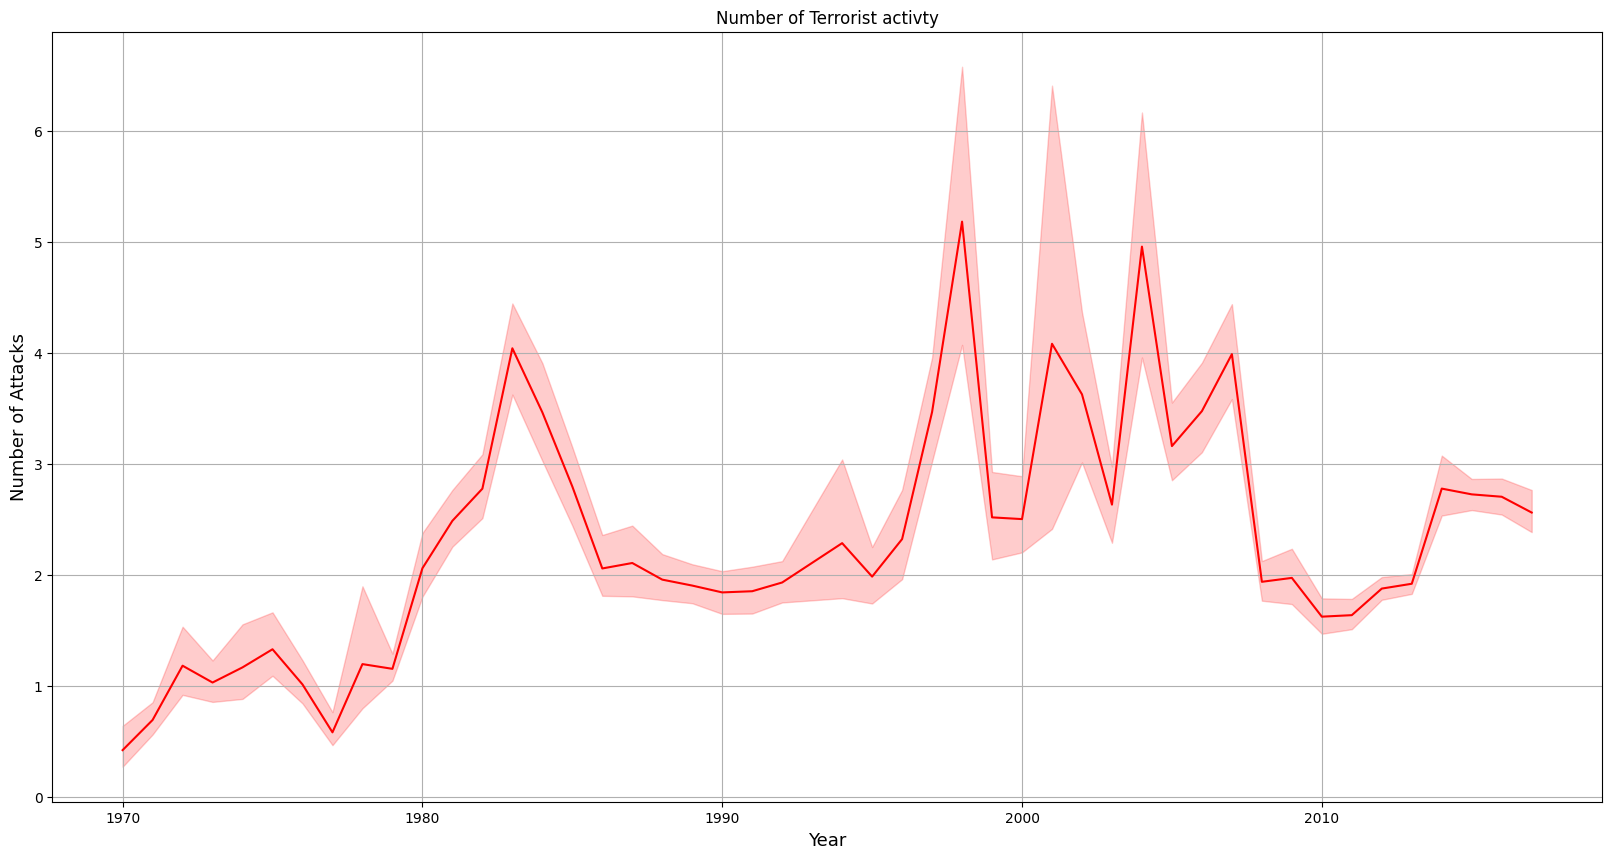

In [148]:
# Number of terroist each year
year_attacks = dataset['number of kills'].value_counts()
# plot variables
plt.figure(figsize = (20, 10))
sns.lineplot(data=dataset, x=year, y=dataset['number of kills'], color= "Red")
plt.grid(True)
# add titles and labels
plt.xlabel('Year', fontsize=13)
plt.ylabel("Number of Attacks", fontsize=13)
plt.title("Number of Terrorist activty")

### Number of injuries from torror activty

Text(0.5, 1.0, 'Number of injuries from torror activty')

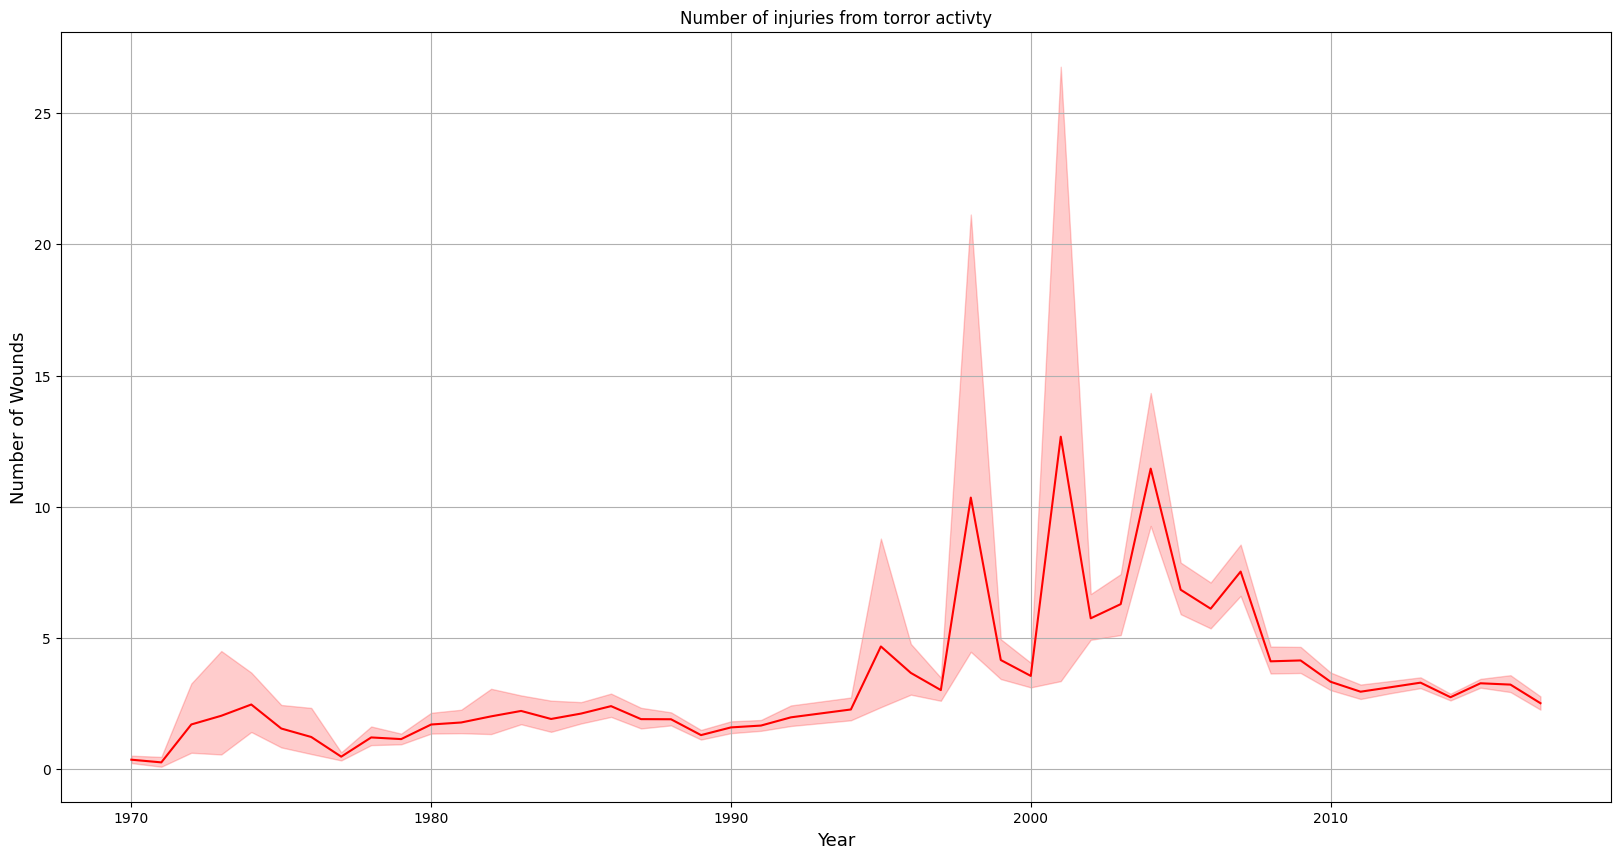

In [149]:
# year for the numbers of wounds
year_wounds = dataset['number of Wounds'].value_counts()
# plot variables
plt.figure(figsize = (20, 10))
sns.lineplot(data=dataset, x=year, y=dataset['number of Wounds'], color= "Red")
plt.grid(True)
# add titles and labels
plt.xlabel('Year', fontsize=13)
plt.ylabel("Number of Wounds", fontsize=13)
plt.title("Number of injuries from torror activty")

#### Conclusion:

#### Global terrorist activity has shown that between 2000 and 2004 there was a significant increase in the number of wounded. Between 1970 to approximately 2000 there was an increase in the number of injuries for the terrorist activities that occurred. However, after 2007 there was a significant decrease in the number of injuries for the terrorist activities.

## Number of terroris activities each year

/var/folders/n5/993s6vqj7ps4scrggc3wzy540000gn/T/ipykernel_55679/176497491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=year, palette="flare")


Text(0.5, 1.0, 'Number of terroris activities each year')

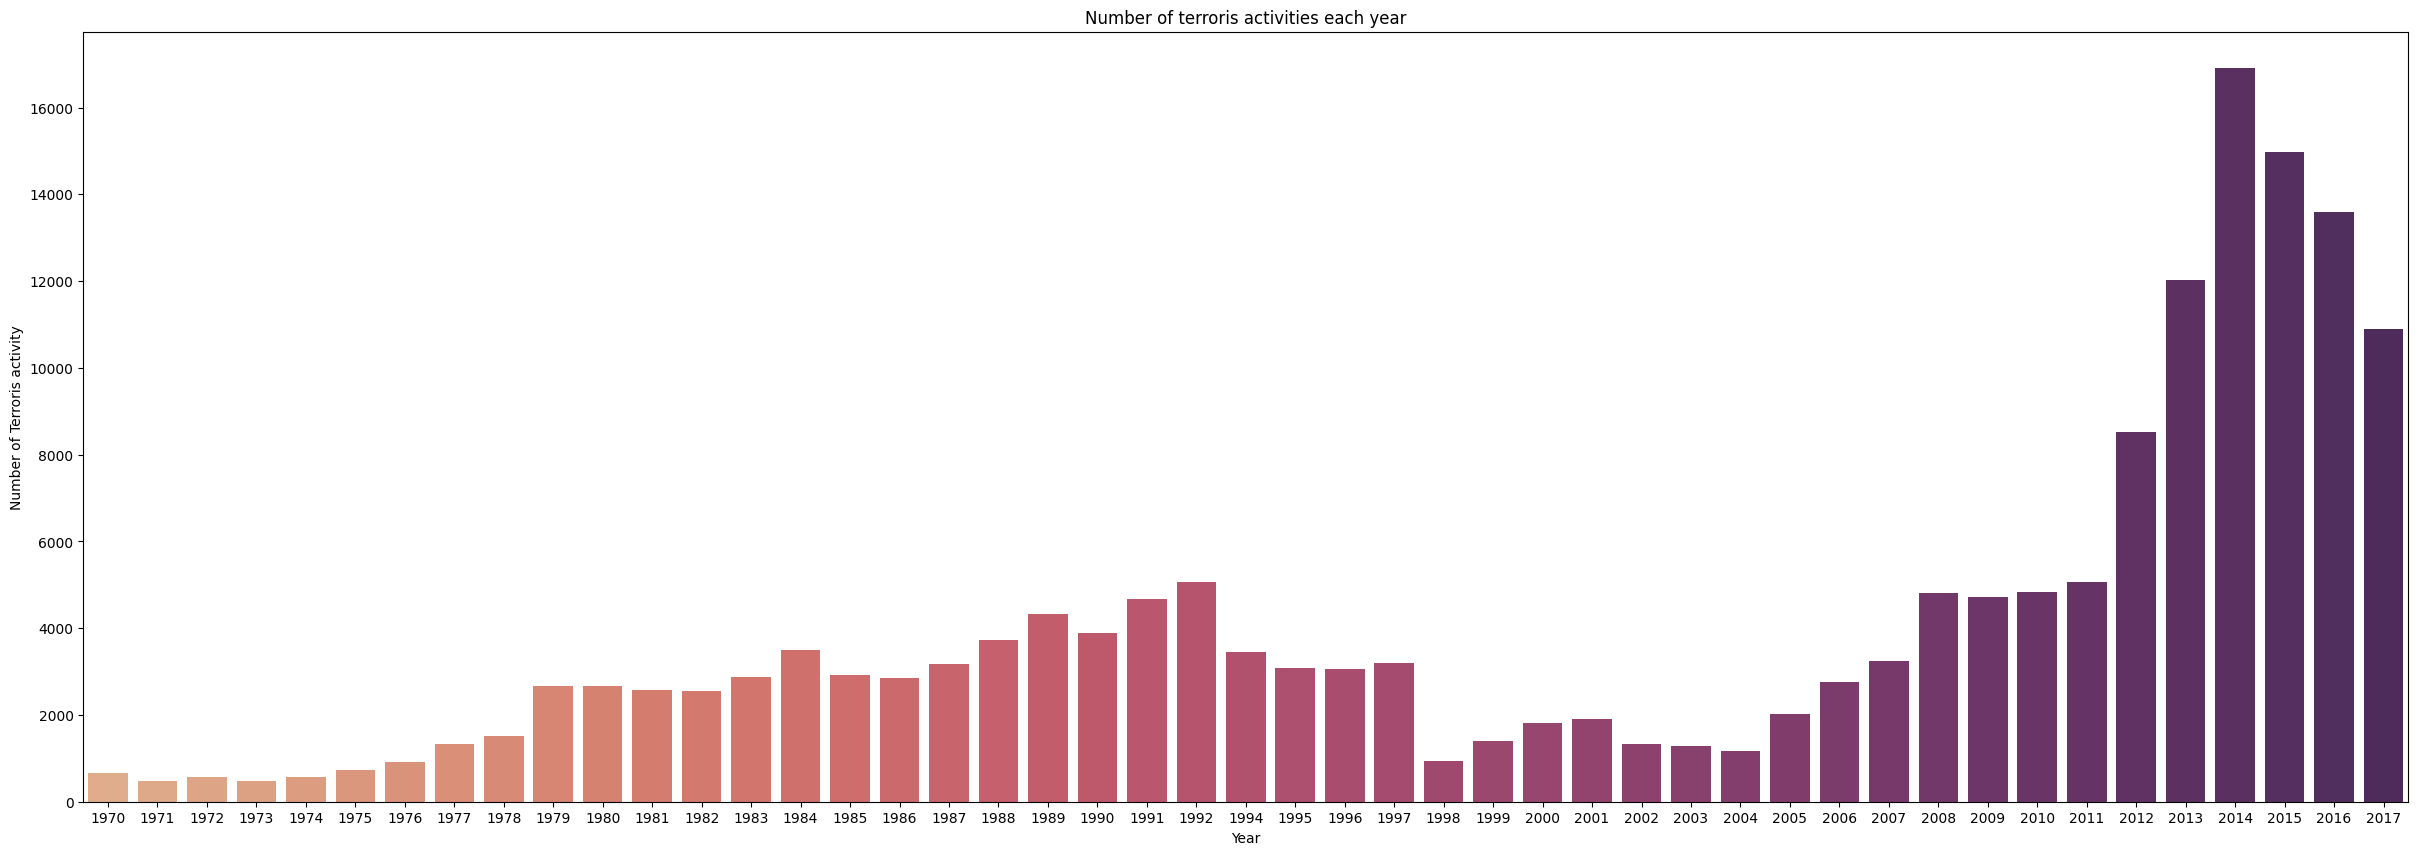

In [150]:
plt.figure(figsize = (30, 10))
sns.countplot(data=dataset, x=year, palette="flare")
plt.ylabel("Number of Terroris activity")
plt.xlabel("Year")
plt.title("Number of terroris activities each year")


### Conclusion:
### Global terrorist activity has risen from 2005 with a peak around 2014 this increase global security activities around the world. The graph shows that there was less terrorist activities in the 1900s compare to the 2000s.

### Number of deaths from terrorist activities each year

/var/folders/n5/993s6vqj7ps4scrggc3wzy540000gn/T/ipykernel_55679/1039244260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=killed, x=year, y=dataset['number of kills'], palette="flare")


Text(0.5, 1.0, 'Number of deaths from terrorist activities each year')

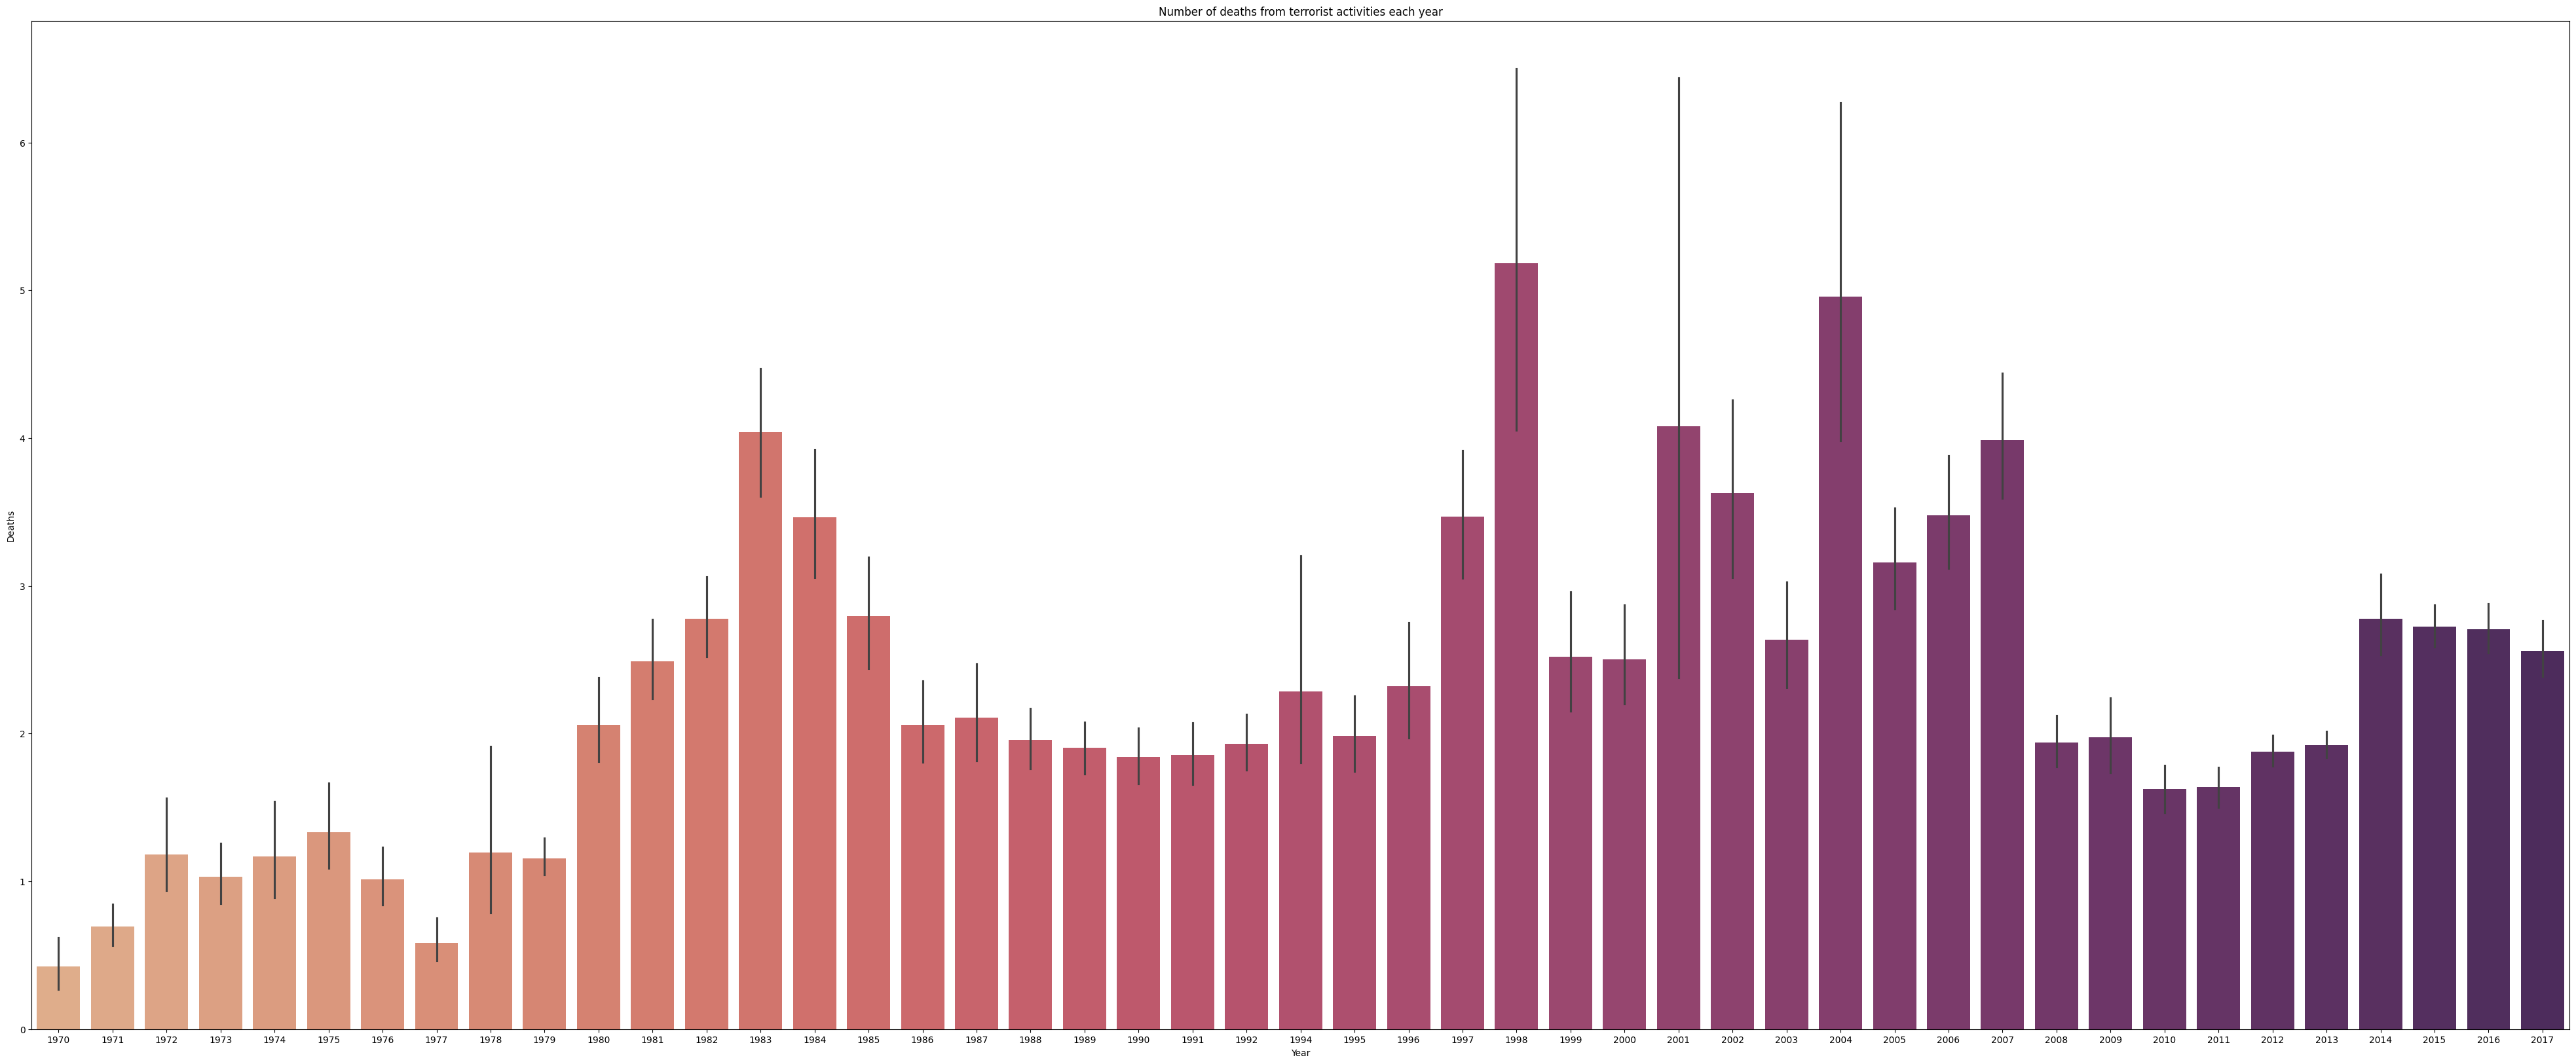

In [151]:
# number of killed each year
killed = dataset.groupby("year")["number of kills"].sum().reset_index()
plt.figure(figsize = (50, 20))
sns.barplot(data=killed, x=year, y=dataset['number of kills'], palette="flare")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Number of deaths from terrorist activities each year")

### Conclusion:
### The number of deaths from terrorist activities has increased throughout the years, a peak in 1998 with the highest record of deaths. The graph shows a significant increase in deaths over the years.

In [152]:
region = pd.crosstab(dataset.year, dataset["region_txt"])
region.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


Text(0.5, 1.0, 'Terrorist activities in regions')

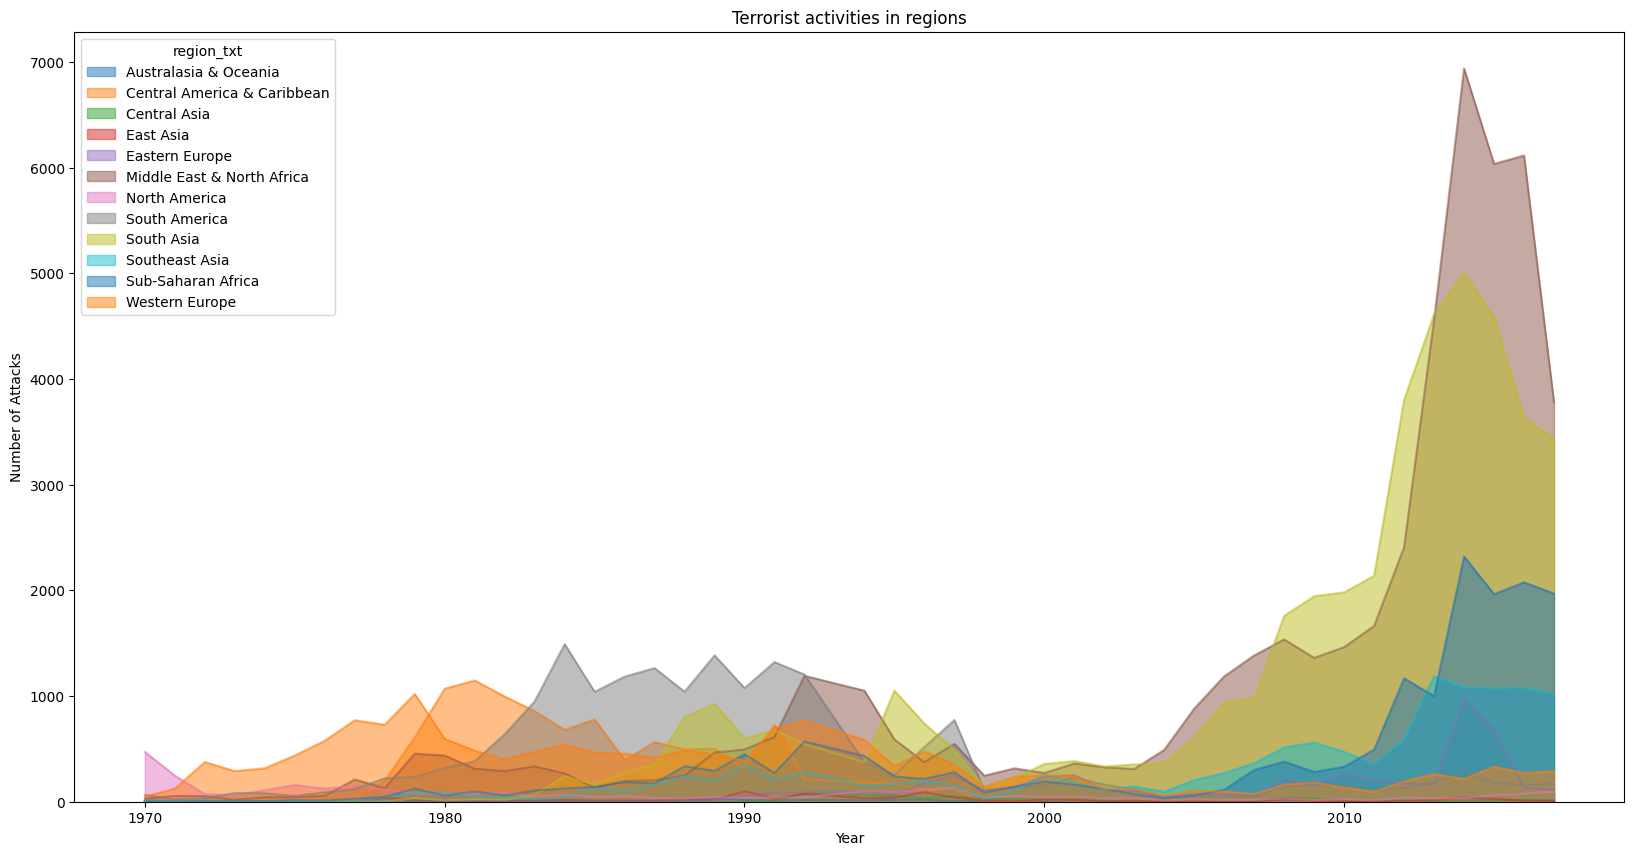

In [153]:
region.plot(kind='area', stacked=False, figsize=(20, 10))
plt.ylabel('Number of Attacks')
plt.xlabel("Year")
plt.title("Terrorist activities in regions")


In [180]:
# country = dataset.groupby('country_txt')["number of kills"].reset_index()
# country = country.sort_values(by='number of kills', ascending=False).head(10)
# country

In [154]:
country = pd.crosstab(dataset.year, dataset["country_txt"])
country.head()

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,21,0,1,0,...,0,0,0,20,0,0,0,0,0,0
1971,0,0,0,0,0,0,7,0,1,0,...,0,0,0,13,0,0,0,0,1,0
1972,0,0,1,0,0,0,20,0,8,7,...,0,0,1,24,0,0,0,3,0,0
1973,1,0,0,0,0,0,60,0,0,2,...,0,0,0,27,0,0,1,1,1,0
1974,0,0,0,1,0,0,71,0,1,1,...,0,0,0,28,0,0,1,0,0,0


Text(0.5, 1.0, 'Terrorist activities in regions')

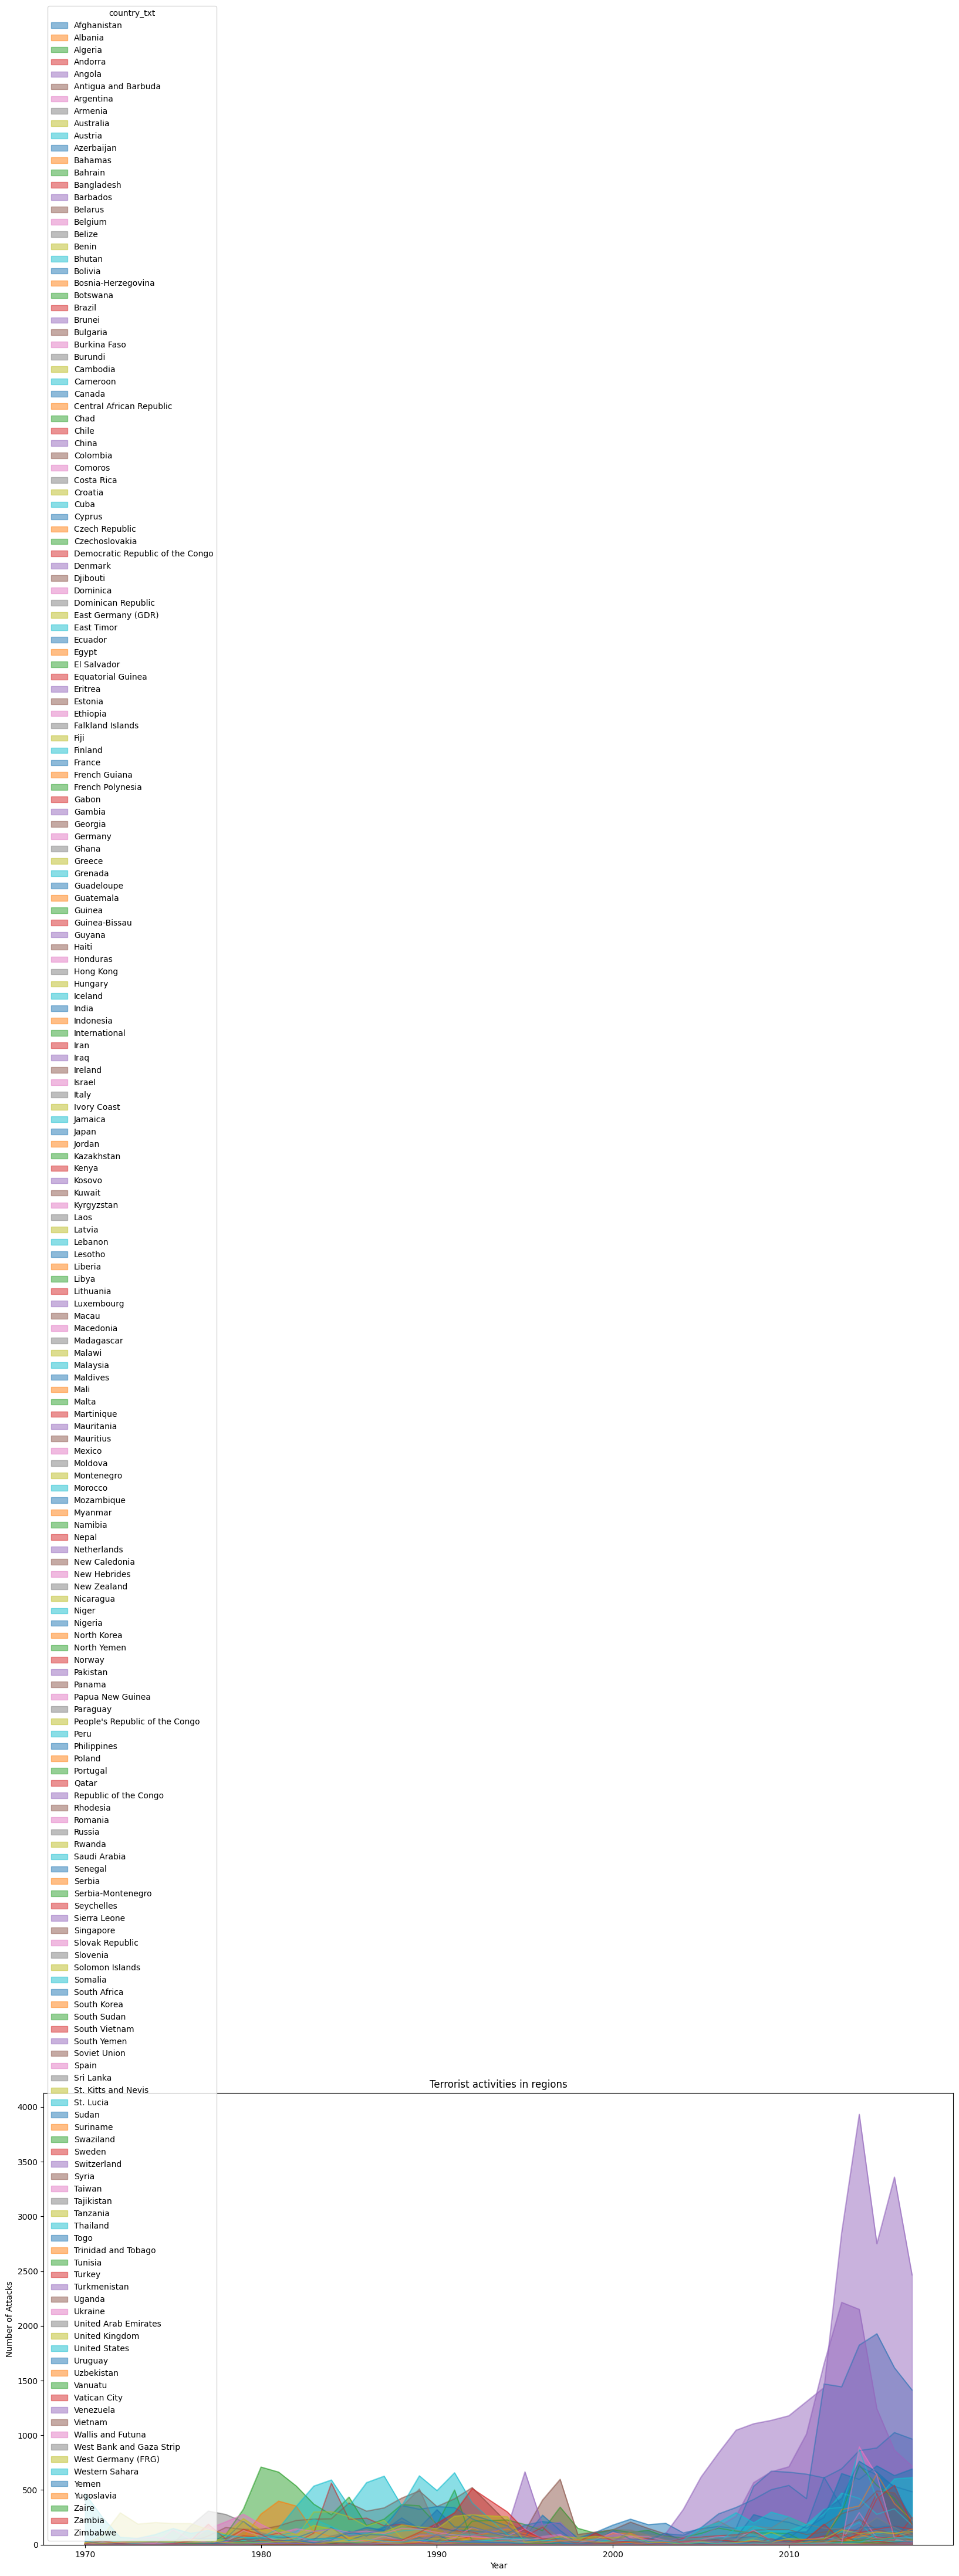

In [155]:
country.plot(kind='area', stacked=False, figsize=(20, 10))
plt.ylabel('Number of Attacks')
plt.xlabel("Year")
plt.title("Terrorist activities in regions")

#### Top 10 Affected Countries

/var/folders/n5/993s6vqj7ps4scrggc3wzy540000gn/T/ipykernel_55679/166153430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country_txt", y='number of kills', data=country, palette="pastel")


Text(0.5, 1.0, 'Top 10 Affected Countries')

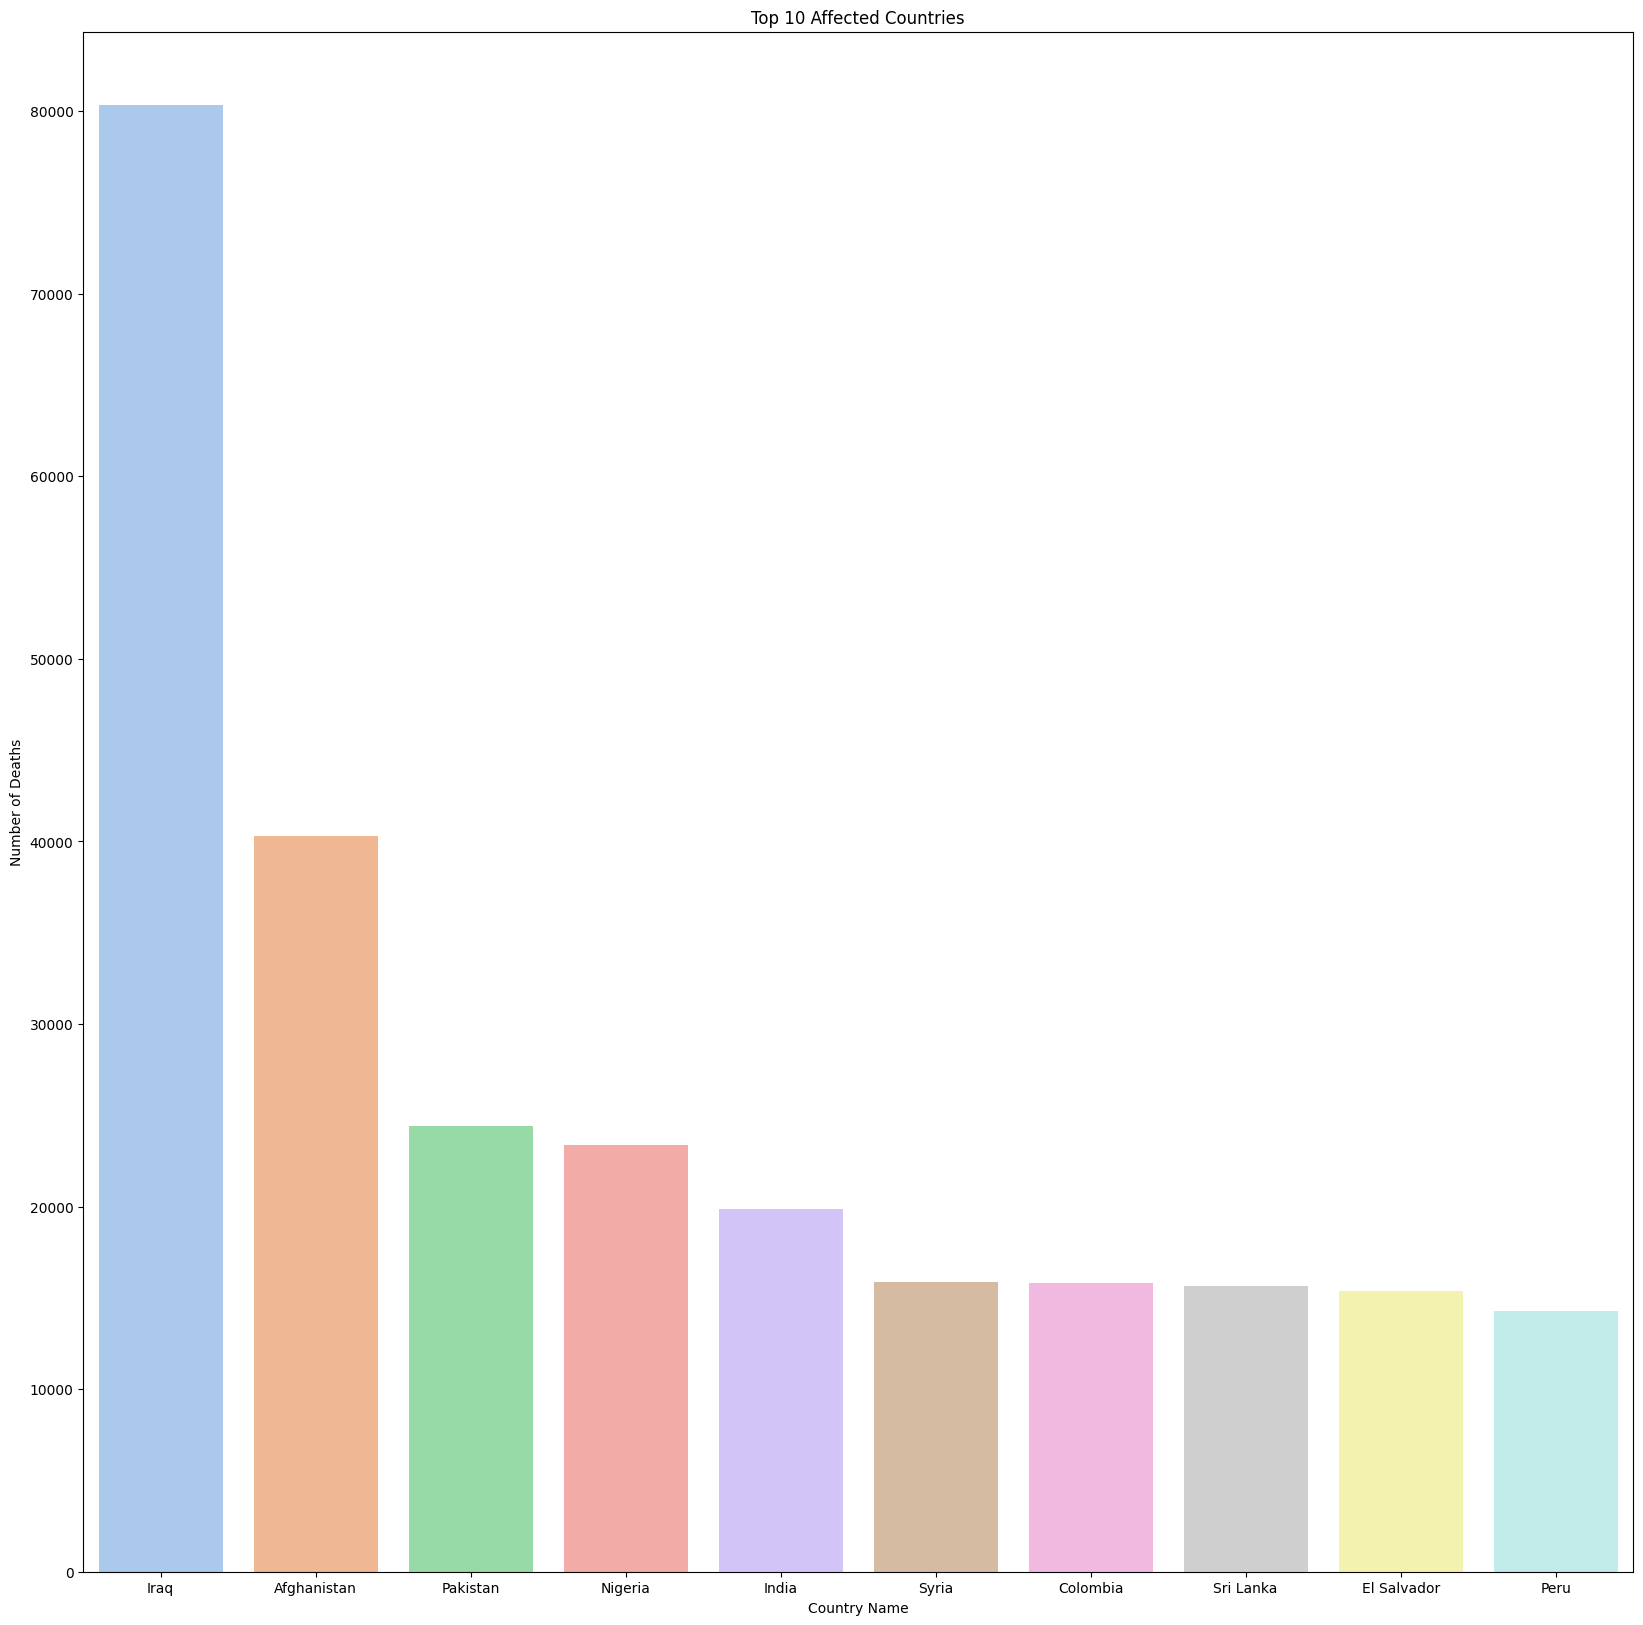

In [192]:
country = dataset.groupby('country_txt')["number of kills"].sum().reset_index()
country = country.sort_values(by='number of kills', ascending=False).head(10)
plt.figure(figsize=(20, 20))
sns.barplot(x="country_txt", y='number of kills', data=country, palette="pastel")
plt.ylabel("Number of Deaths")
plt.xlabel("Country Name")
plt.title("Top 10 Affected Countries")

## Affected countries
- Iraq
- Afghanistan

/var/folders/n5/993s6vqj7ps4scrggc3wzy540000gn/T/ipykernel_55679/3352031977.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="city", y='number of Wounds', data=city, palette="pastel")


Text(0.5, 1.0, 'Top 10 Affected City')

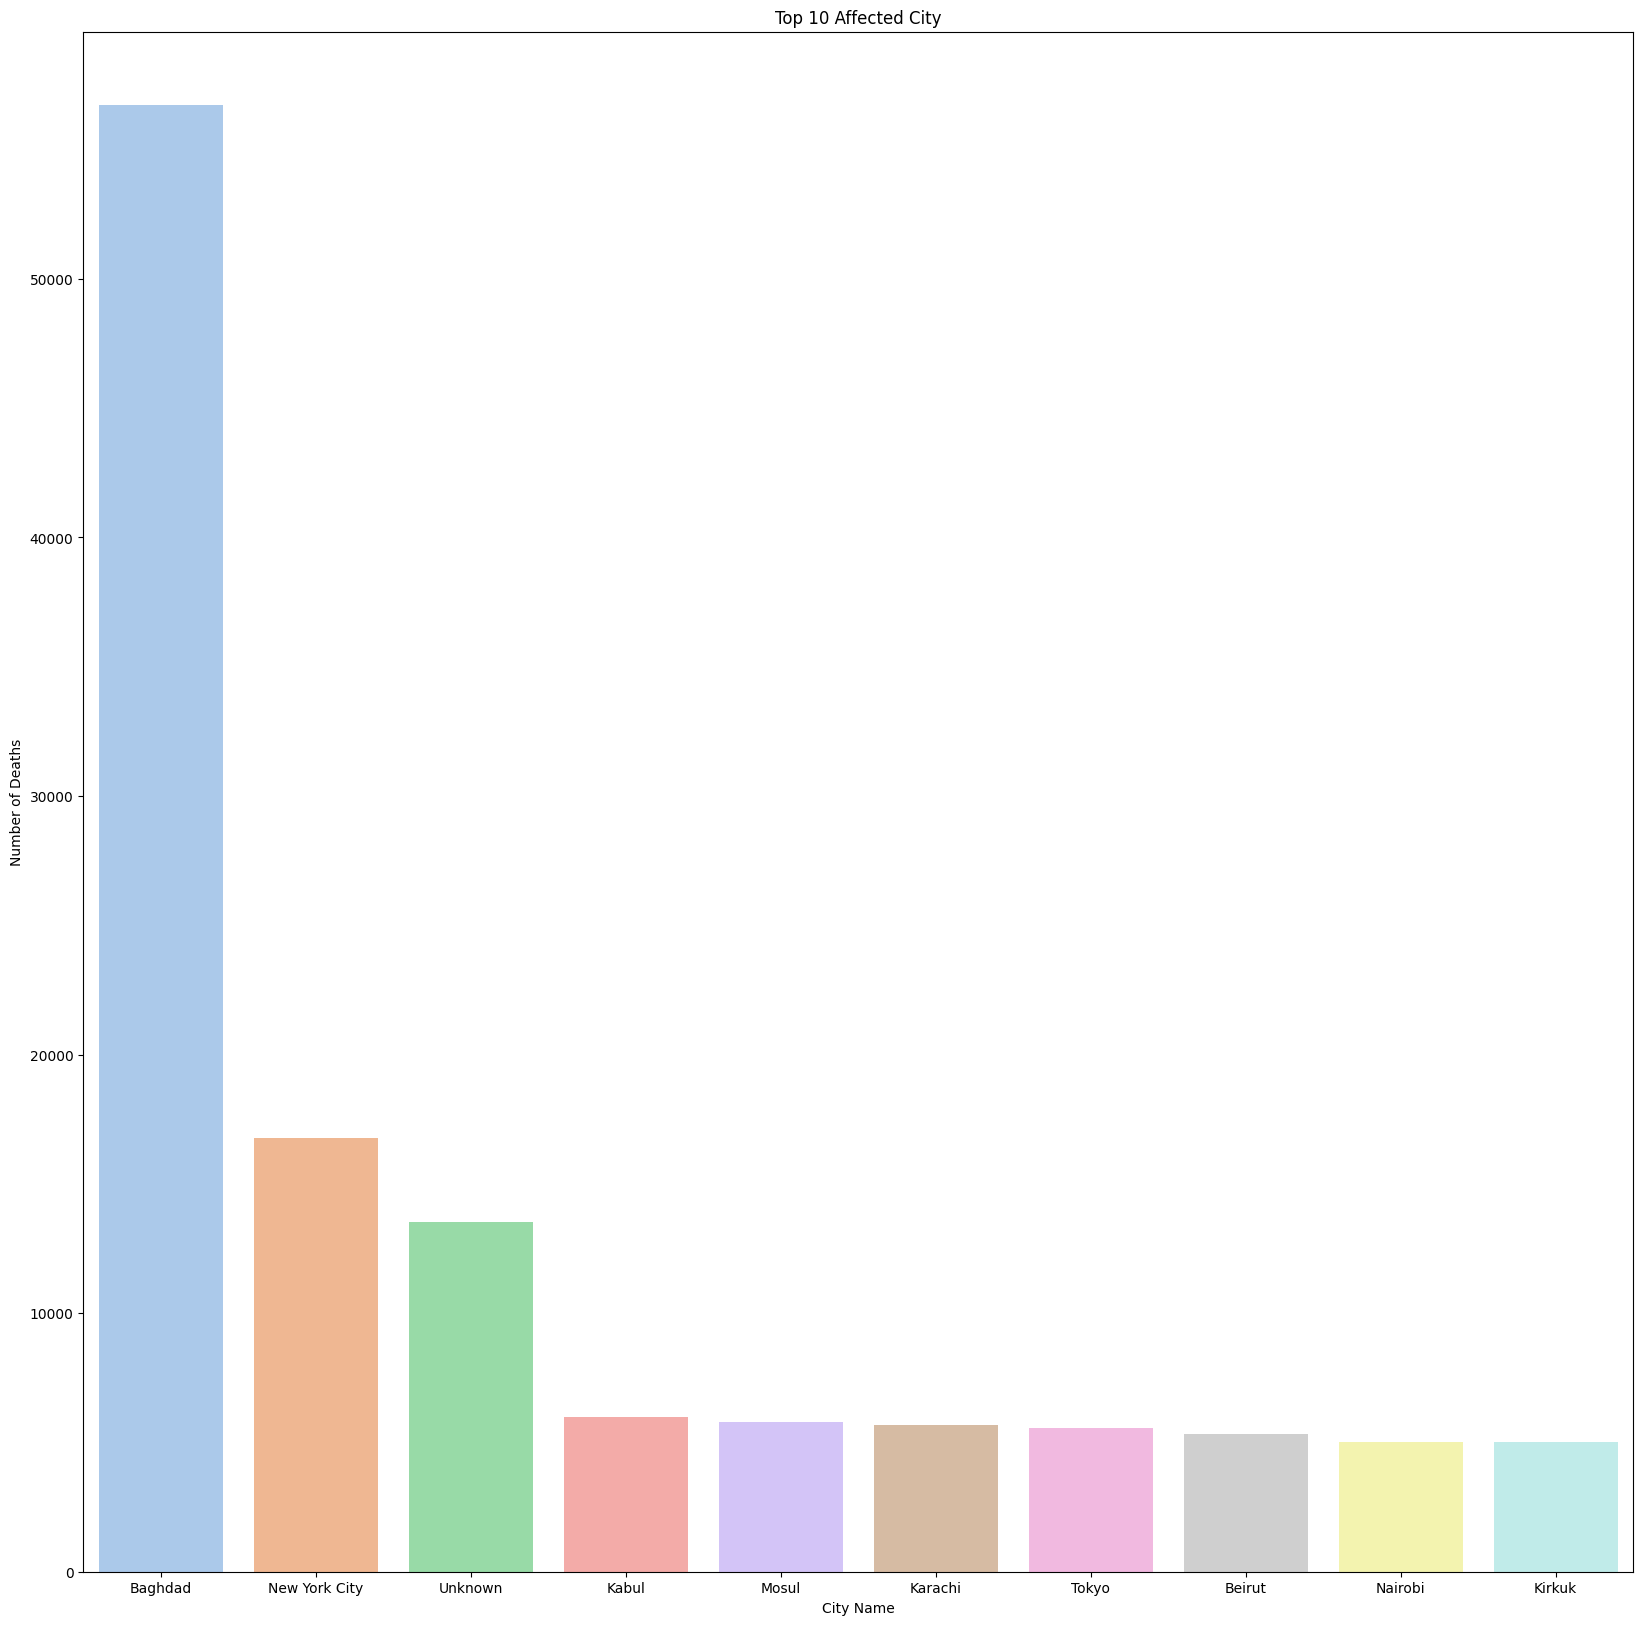

In [200]:
city = dataset.groupby('city')["number of Wounds"].sum().reset_index()
city = country.sort_values(by='number of Wounds', ascending=False).head(10)
plt.figure(figsize=(20, 20))
sns.barplot(x="city", y='number of Wounds', data=city, palette="pastel")
plt.ylabel("Number of Deaths")
plt.xlabel("City Name")
plt.title("Top 10 Affected City")

### Affected city
- Baghdad
- NYC
- Unknown

### Top Terrorist Groups

Text(0.5, 1.0, 'Different Attack Methods by Terrorist Groups')

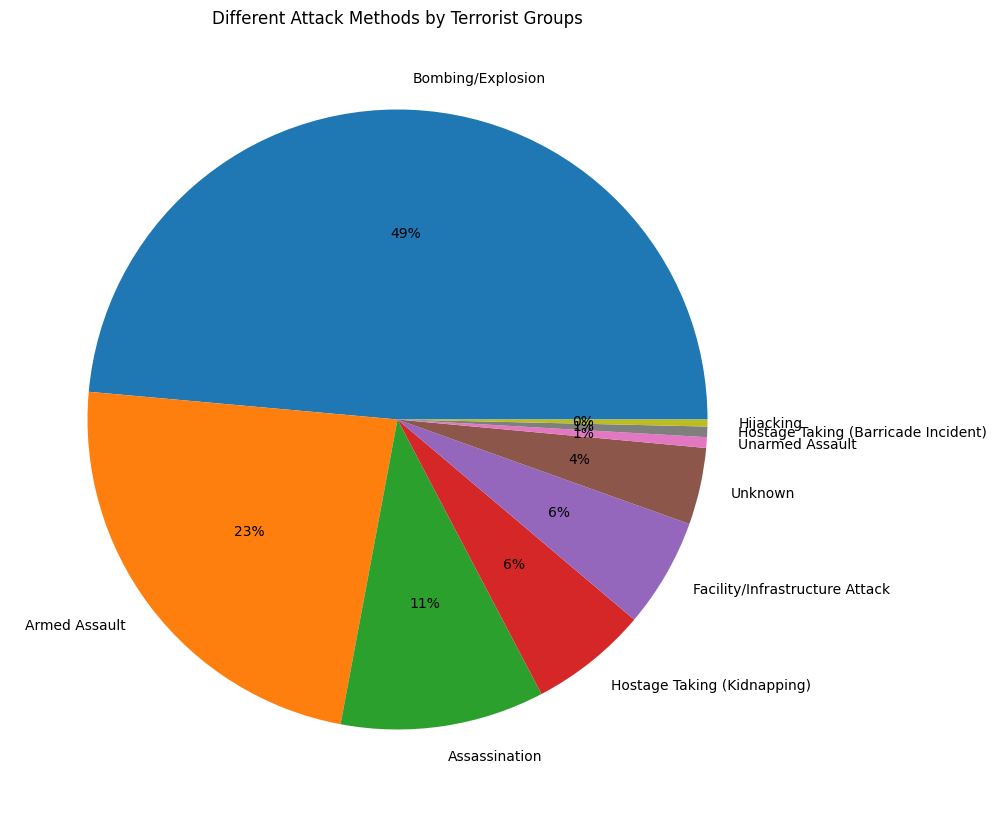

In [211]:
Attack_group = dataset.attacktype1_txt.value_counts()
plt.figure(figsize=(10, 20))
plt.pie(Attack_group, autopct='%1.0f%%', labels=Attack_group.index)
plt.title("Different Attack Methods by Terrorist Groups")

In [224]:
dataset.target1.sort_values()

64930                   "A. Xhuvani" University
66084                     "Administration Post"
7069                         "Building Society"
55440     "Businessmen" Express, Cairo to Luxor
52396             "Colombia" crude oil pipeline
                          ...                  
104721                                      NaN
104722                                      NaN
104723                                      NaN
104724                                      NaN
104771                                      NaN
Name: target1, Length: 181691, dtype: object

Text(0.5, 1.0, 'Top 10 Target Attacks')

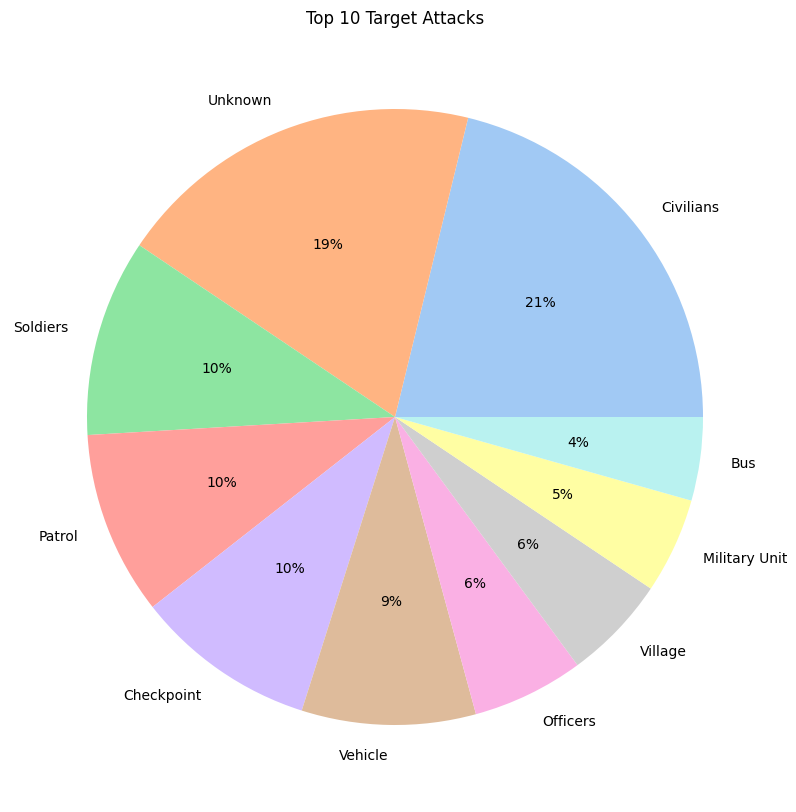

In [237]:
# set pie chart
targets = dataset['target1'].value_counts().head(10)
plt.figure(figsize=(80, 10))
labels = ['Civilians', 'Unknown', 'Soldiers', 'Patrol', 'Checkpoint', 'Vehicle']
colors = sns.color_palette("pastel")
plt.pie(targets, colors=colors, labels=targets.index, autopct='%1.0f%%')
plt.title("Top 10 Target Attacks")

#### Most of the targets were unknown and civilians based on the terrorist attacks that occurred.

Text(0.5, 1.0, 'HeatMap')

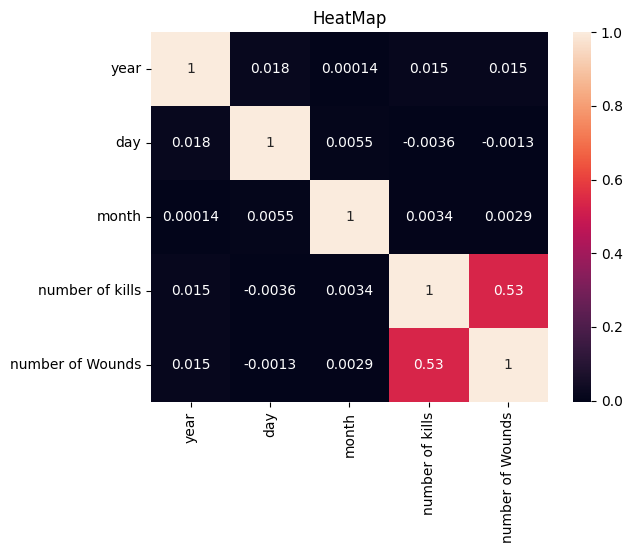

In [243]:
# heat map
sns.heatmap(dataset[['year', 'day', 'month', 'number of kills', 'number of Wounds']].corr(), annot=True)
plt.title("HeatMap")

In [248]:
#### Total wounded by year
wounded_year = dataset.groupby("year")[['number of Wounds']].sum()
wounded_year = wounded_year.sort_values(by='number of Wounds', ascending=False)
wounded_year.head()

,number of Wounds
year,
2015,44043.0
2014,41128.0
2016,40001.0
2013,37688.0
2012,25445.0


In [213]:
# weapons per region
# fig = plt.figure(figsize=(40, 40))
# sns.barplot(data=dataset2, x="region_txt", y="weaptype1_txt", palette="pastel")
# plt.ylabel("Weapon Type")
# plt.xlabel("City")
# plt.title("Weapon Type For Each Region")

In [216]:
# country per weapon
# fig = plt.figure(figsize=(400, 30))
# sns.lineplot(data=dataset2, x="country_txt", y="weaptype1_txt")
# plt.ylabel("Weapon Type")
# plt.xlabel("Country")
# plt.title("Weapon Type For Each Country")

In [215]:
# The weapons that was used over the years for each target
# fig = plt.figure(figsize=(40, 10))
# sns.lineplot(data=dataset2, x="year", y="weaptype1_txt")
# plt.ylabel("Weapon Type")
# plt.xlabel("Year")
# plt.title("Weapon Type For Each Country")

In [250]:
# region per weapon
# set the width and height
# fig = plt.figure(figsize=(80, 10))
# set the line plot
# sns.lineplot(data=dataset2, x="region_txt", y="targtype1_txt")
# set y label
# plt.ylabel("Target")
# set x label
# plt.xlabel("Region")

In [249]:
# year per target
# set width and height
# fig = plt.figure(figsize=(80, 10))
# set line plot
# sns.lineplot(data=dataset2, x="year", y="targtype1_txt", hue='weaptype1_txt')
# set y label
# plt.ylabel("Targets")
# set x label
# plt.xlabel("Year")
# title
# plt.title("Weapons Used on Each Target per Year")

#### Bar Chart

Text(0.5, 1.0, 'Weapon Type For Each Country')

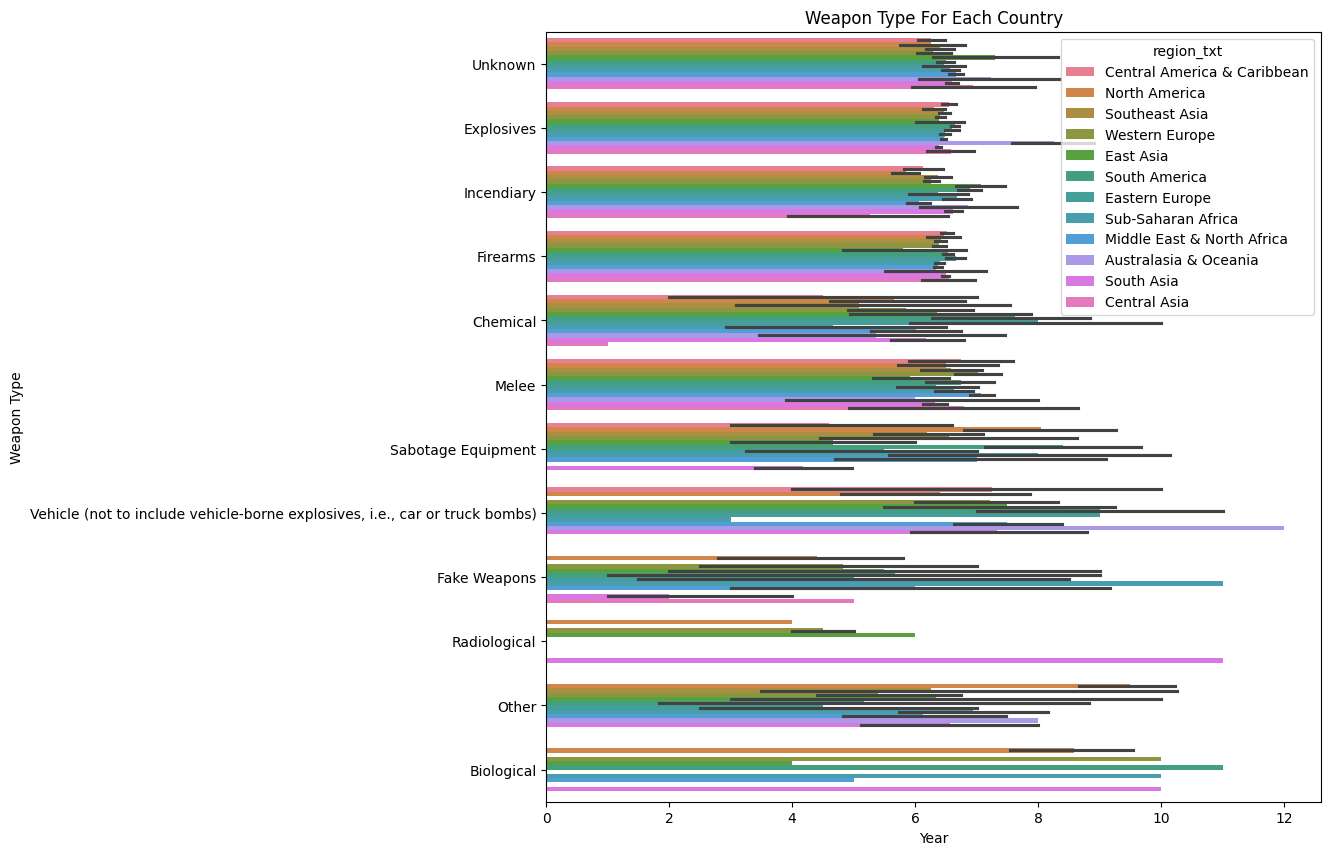

In [161]:
# Pie Chart for the number of weapons used
# set width and width
fig = plt.figure(figsize=(10, 10))
# set bar plot
sns.barplot(data=dataset2, x="month", y="weaptype1_txt", hue="region_txt")
# set y label
plt.ylabel("Weapon Type")
# x label
plt.xlabel("Year")
# set title
plt.title("Weapon Type For Each Country")

In [166]:
# drop columns to create a new dataset
new_dataset = dataset.drop(['latitude', 'longitude', "eventid", "approxdate", "extended", "resolution", "country", "region", "specificity", "vicinity", "crit1", "crit2", "crit3", "doubtterr", "multiple", "success", "suicide", "attacktype1", "attacktype2", "attacktype2_txt", "attacktype3", "attacktype3_txt", "targtype1", "targsubtype1", "natlty1", "targtype2", "targtype2_txt", "targsubtype2", "targsubtype2_txt", "corp2", "target2", "natlty2", "natlty2_txt", "targtype3", "targtype3_txt", "targsubtype3", "targsubtype3_txt", "corp3", "target3", "natlty3", "natlty3_txt", "gsubname", "gname2", "gname2", "gname3", "gsubname3", "guncertain1", "guncertain2", "guncertain3", 
                            "individual", "nperps", "nperps", "nperps", "nperps", "nperps", "nperps", "nperps", "claimmode2_txt", "claim3",  "claimmode3", "compclaim", "weaptype1", "weaptype1_txt", "weapsubtype1", "weapsubtype1_txt", "weaptype2", "weaptype2_txt", "weapsubtype2", "weapsubtype2_txt", "weaptype3", "weaptype3_txt", "weapsubtype3", "weapsubtype3_txt", "weaptype4", "weaptype4_txt", "weapsubtype4", "weapsubtype4_txt", "number of kills", "nkillus", "nkillter", "number of Wounds", "nwoundus", "nwoundte", "property", "propextent", "propextent_txt", "propvalue", "propcomment", "ishostkid", "nhostkid", "nhostkidus", "nhours", "ndays", "divert", "kidhijcountry", 
                            "ransom", "ransomamt", "ransomamtus", "ransompaid", "ransompaidus", "ransomnote", "hostkidoutcome", "hostkidoutcome_txt", "nreleased", "addnotes", "scite1", "scite2", "scite3", "dbsource", "INT_LOG", "INT_IDEO", "INT_MISC", "INT_ANY", "related", "gsubname2", "motive", "nperpcap", "claimed", "claimmode", "claimmode_txt", "claim2", "claimmode2", "claimmode3_txt", "weapdetail", 'alternative', 'alternative_txt', 'country_txt', 'region_txt'], axis="columns")
new_dataset

,year,month,day,provstate,city,location,summary,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,causualities
0,1970,7,2,NaN,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,1.0
1,1970,0,0,Federal,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0
2,1970,1,0,Tarlac,Unknown,NaN,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,1.0
3,1970,1,0,Attica,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,NaN
4,1970,1,0,Fukouka,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Middle Shebelle,Ceelka Geelow,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Military Checkpoint,Somali National Army (SNA),Checkpoint,Somalia,Al-Shabaab,3.0
181687,2017,12,31,Lattakia,Jableh,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,Russia,Muslim extremists,9.0
181688,2017,12,31,Maguindanao,Kubentog,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Not Applicable,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0
181689,2017,12,31,Manipur,Imphal,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Government Building/Facility/Office,Forest Department Manipur,Office,India,Unknown,0.0


In [167]:
x = new_dataset.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'country_txt': 'country', 
                                'region_txt': 'region', 'attacktype1_txt': 'attacktype1', 'targtype1_txt': 'target1', 
                                'targsubtype1_txt': 'target_subject', 'natlty1_txt': 'natlty1'})
x

,year,month,day,provstate,city,location,summary,attacktype1,target1,target_subject,corp1,target1,natlty1,gname,causualities
0,1970,7,2,NaN,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,1.0
1,1970,0,0,Federal,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0
2,1970,1,0,Tarlac,Unknown,NaN,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,1.0
3,1970,1,0,Attica,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,NaN
4,1970,1,0,Fukouka,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Middle Shebelle,Ceelka Geelow,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Military Checkpoint,Somali National Army (SNA),Checkpoint,Somalia,Al-Shabaab,3.0
181687,2017,12,31,Lattakia,Jableh,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,Russia,Muslim extremists,9.0
181688,2017,12,31,Maguindanao,Kubentog,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Not Applicable,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0
181689,2017,12,31,Manipur,Imphal,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Government Building/Facility/Office,Forest Department Manipur,Office,India,Unknown,0.0


Text(0.5, 1.0, 'Number of Attacks')

<Figure size 30000x10000 with 0 Axes>

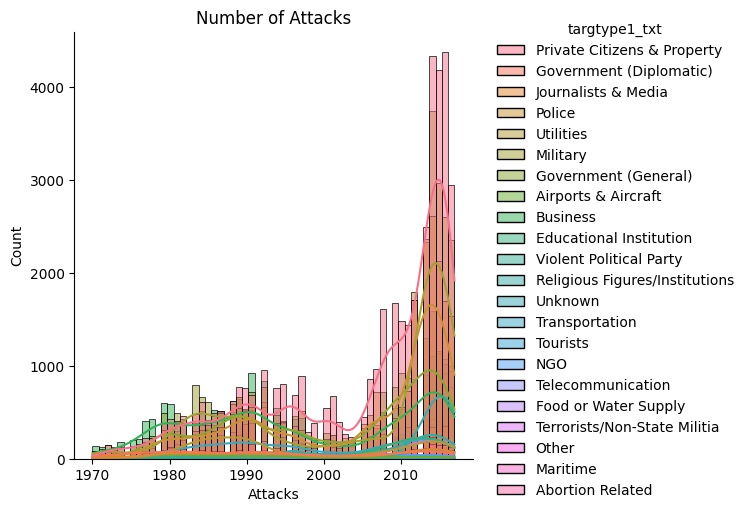

In [169]:
# distribution plot
# set the width and height
plt.figure(figsize=(300, 100))
# set the dist plot
sns.displot(data=new_dataset, x="year", hue="targtype1_txt", kde=True)
# x label
plt.xlabel("Attacks")
# title 
plt.title("Number of Attacks")

## Overall

The global terrorists mostly happens in the middle east and North Africa, as well as south and North America. These regions have witnessed significant increase in terrorist activities, posing threats to different regions using different methods of attacks targeting different people.

The use of bombing and explosives were primary tatics for most of the attacks that resulted in substantial casualties and widespread destruction. 

Overall, the global terrorist activities occurred mostly in the middle east, North Africa, south/north america using different tatics and techniques to create destructive and devastating attacks around the world.